In [49]:
from nltk_utils import Helper
import random
from gensim import models
import json
import pickle
import numpy as np
import tensorflow as tf
from string import punctuation
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
# tf.config.set_visible_devices([], 'GPU')

In [50]:

df = pd.read_csv('./assets/data.csv')
# df.head()

slang_df = pd.read_csv('./assets/slangs.csv')


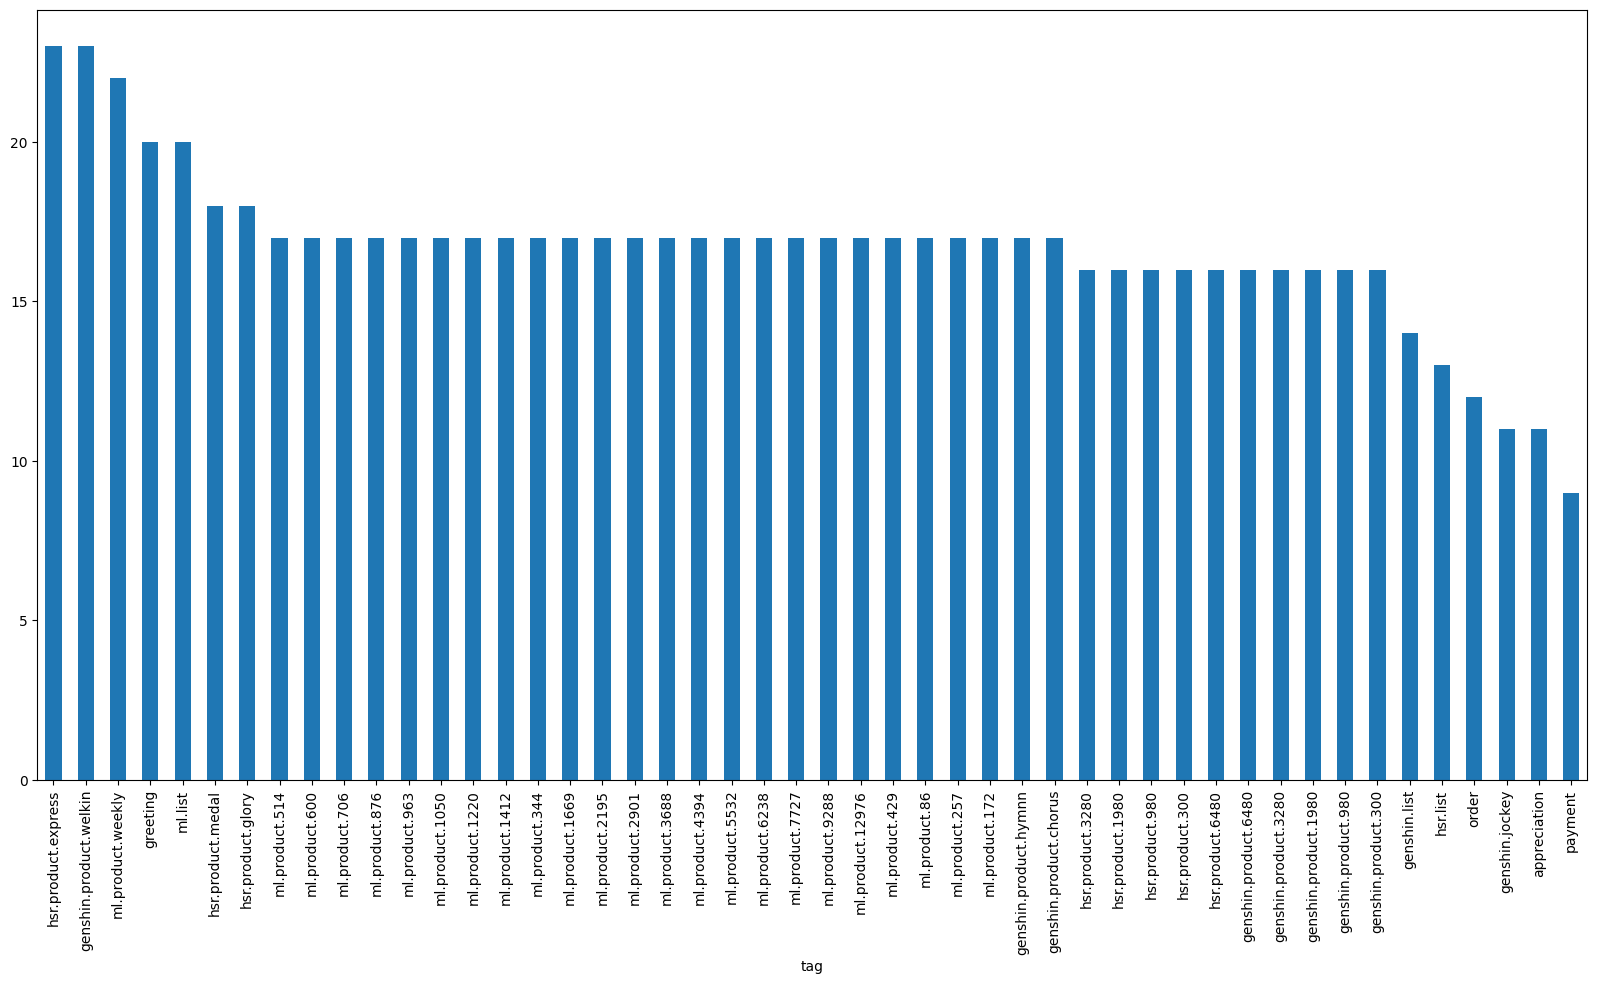

In [51]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,1)
fig.set_size_inches(20,10)
fig = df["tag"].value_counts().plot.bar(ax)

## Preprocess

### Remove punctuation

In [52]:
helper = Helper()
patterns = df.pattern.values
tags = df.tag.values
clean_patterns = []
for text in patterns:
    clean_patterns.append(helper.remove_punctuations(text))

clean_patterns

['hi',
 'hei',
 'halo',
 'selamat pagi',
 'selamat siang',
 'selamat sore',
 'halo min mau tanya',
 'min mau top up sudah buka belum',
 'udah bisa topup min',
 'halo kak',
 'kak mau topup',
 'min mau topup ready kah',
 'hai min',
 'ini dengan adeptushop',
 'permisi ini benar dengan yang ig nya adeptushop',
 'ini benar kontaknya adeptushop',
 'apa benar ini adeptushop',
 'yang adeptushop bukan',
 'ini yang toko topup bukan',
 'ini dengan adeptushop ya',
 'ini cara ordernya gimana min',
 'lewat uid atau apa ya',
 'lewat id atau apa ya',
 'pake id tah min',
 'via login apa uid bang',
 'minta format ordernya min',
 'cara belinya gimana ya',
 'jadinya yang itu deh',
 'formatnya gimana',
 'mau deh yang itu',
 'boleh deh yang itu',
 'mau beli min gimana formatnya',
 'min tf nya kemana',
 'tf nya gimana ya bang',
 'bayarnya kemana ya',
 'bayar kemana bang',
 'lewat apa bayarnya',
 'bisa qris nggak',
 'kemana tf nya',
 'bisa pake mandiri',
 'minta no tf nya',
 'boleh pricelist untuk genshin',
 

### Manage Slang Words

In [53]:
removed_slangs = []
for text in clean_patterns:
    removed_slangs.append(helper.slang_cleaning(text, slang_df))

# removed_slangs


### Remove Stopwords

In [54]:
removed_stopwords = []
for text in removed_slangs:
    removed_stopwords.append(helper.stopword_removal(text))

removed_stopwords

['hi',
 'hei',
 'halo',
 'selamat pagi',
 'selamat siang',
 'selamat sore',
 'halo admin',
 'admin top up buka',
 'topup admin',
 'halo kak',
 'kak topup',
 'admin topup ready kah',
 'hai admin',
 'adeptushop',
 'permisi instagram adeptushop',
 'kontak adeptushop',
 'adeptushop',
 'adeptushop',
 'toko topup',
 'adeptushop',
 'order admin',
 'uid',
 'id',
 'pakai id teh admin',
 'login uid bang',
 'format order admin',
 'beli',
 'deh',
 'format',
 'deh',
 'deh',
 'beli admin format',
 'admin transfer kemana',
 'transfer bang',
 'bayar kemana',
 'bayar kemana bang',
 'bayar',
 'qris enggak',
 'kemana transfer',
 'pakai mandiri',
 'no transfer',
 'pricelist genshin impact',
 'pricelist harga genshin impact kak',
 'listnya admin genshin impact',
 'pricelist genshin impact',
 'pricelist genshin impact admin',
 'genshin impact pricelist',
 'genshin impact',
 'daftar harga genshin impact kak',
 'lihat harga genshinnya kak',
 'daftar genshin impact',
 'daftar harga genshin impact admin',
 'pag

### Tokenize

In [55]:
tokenized_text = []
for text in removed_stopwords:
    tokenized_text.append(helper.tokenize(text))

tokenized_text

[['hi'],
 ['hei'],
 ['halo'],
 ['selamat', 'pagi'],
 ['selamat', 'siang'],
 ['selamat', 'sore'],
 ['halo', 'admin'],
 ['admin', 'top', 'up', 'buka'],
 ['topup', 'admin'],
 ['halo', 'kak'],
 ['kak', 'topup'],
 ['admin', 'topup', 'ready', 'kah'],
 ['hai', 'admin'],
 ['adeptushop'],
 ['permisi', 'instagram', 'adeptushop'],
 ['kontak', 'adeptushop'],
 ['adeptushop'],
 ['adeptushop'],
 ['toko', 'topup'],
 ['adeptushop'],
 ['order', 'admin'],
 ['uid'],
 ['id'],
 ['pakai', 'id', 'teh', 'admin'],
 ['login', 'uid', 'bang'],
 ['format', 'order', 'admin'],
 ['beli'],
 ['deh'],
 ['format'],
 ['deh'],
 ['deh'],
 ['beli', 'admin', 'format'],
 ['admin', 'transfer', 'kemana'],
 ['transfer', 'bang'],
 ['bayar', 'kemana'],
 ['bayar', 'kemana', 'bang'],
 ['bayar'],
 ['qris', 'enggak'],
 ['kemana', 'transfer'],
 ['pakai', 'mandiri'],
 ['no', 'transfer'],
 ['pricelist', 'genshin', 'impact'],
 ['pricelist', 'harga', 'genshin', 'impact', 'kak'],
 ['listnya', 'admin', 'genshin', 'impact'],
 ['pricelist', 'gen

### Convert to Train data

In [56]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(tokenized_text)
train = tokenizer.texts_to_sequences(tokenized_text)
train

[[89],
 [90],
 [77],
 [78, 74],
 [78, 91],
 [78, 92],
 [77, 2],
 [2, 64, 65, 93],
 [3, 2],
 [77, 13],
 [13, 3],
 [2, 3, 14, 94],
 [95, 2],
 [71],
 [8, 96, 71],
 [97, 71],
 [71],
 [71],
 [98, 3],
 [71],
 [79, 2],
 [84],
 [85],
 [86, 85, 99, 2],
 [100, 84, 7],
 [80, 79, 2],
 [6],
 [31],
 [80],
 [31],
 [31],
 [6, 2, 80],
 [2, 75, 76],
 [75, 7],
 [81, 76],
 [81, 76, 7],
 [81],
 [101, 26],
 [76, 75],
 [86, 102],
 [103, 75],
 [28, 19, 20],
 [28, 12, 19, 20, 13],
 [82, 2, 19, 20],
 [28, 19, 20],
 [28, 19, 20, 2],
 [19, 20, 28],
 [19, 20],
 [59, 12, 19, 20, 13],
 [83, 12, 104, 13],
 [59, 19, 20],
 [59, 12, 19, 20, 2],
 [74, 66, 59, 12, 19, 20],
 [66, 28, 19, 20],
 [66, 59, 12, 19, 20],
 [12, 72, 19, 20],
 [72],
 [63],
 [72, 13],
 [62, 19, 20],
 [63],
 [62, 19, 20],
 [63],
 [62, 19, 20],
 [64, 65, 63],
 [64, 65, 62, 19, 20, 2],
 [2, 6, 63],
 [2, 6, 63],
 [2, 6, 62, 19, 20],
 [63, 15],
 [62, 19, 20, 15],
 [63, 14, 26],
 [62, 19, 20, 14, 26],
 [63, 2],
 [72, 2],
 [72, 7],
 [8, 3, 72],
 [8, 3, 63]

In [57]:
# cls = []
# category = pd.unique(tags)
# category = category.tolist()
# for i in range(len(tags)):
#     one_hot = np.zeros((len(category),), dtype=int)
#     idx = category.index(tags[i])
#     one_hot[idx] = 1
#     cls.append(one_hot)
# cls = np.array(cls)
# cls


In [58]:
# tags = dict()
# for i in range(len(category)) :
#     tags[i] = category[i]
# tags
df.tag.values

array(['greeting', 'greeting', 'greeting', 'greeting', 'greeting',
       'greeting', 'greeting', 'greeting', 'greeting', 'greeting',
       'greeting', 'greeting', 'greeting', 'greeting', 'greeting',
       'greeting', 'greeting', 'greeting', 'greeting', 'greeting',
       'order', 'order', 'order', 'order', 'order', 'order', 'order',
       'order', 'order', 'order', 'order', 'order', 'payment', 'payment',
       'payment', 'payment', 'payment', 'payment', 'payment', 'payment',
       'payment', 'genshin.list', 'genshin.list', 'genshin.list',
       'genshin.list', 'genshin.list', 'genshin.list', 'genshin.list',
       'genshin.list', 'genshin.list', 'genshin.list', 'genshin.list',
       'genshin.list', 'genshin.list', 'genshin.list',
       'genshin.product.welkin', 'genshin.product.welkin',
       'genshin.product.welkin', 'genshin.product.welkin',
       'genshin.product.welkin', 'genshin.product.welkin',
       'genshin.product.welkin', 'genshin.product.welkin',
       'genshin.

In [59]:
word_index = tokenizer.word_index
print('unique tokens: ' + str(len(word_index)))
# word_index

unique tokens: 115


In [60]:

f = open('assets/tokenizer.pickle', 'wb')
pickle.dump(tokenizer, f)
f.close()

In [61]:
# hyper params
max_len=20
output_dim=300

In [62]:
train = pad_sequences(train, maxlen=20)
train
# len(tags)

array([[ 0,  0,  0, ...,  0,  0, 89],
       [ 0,  0,  0, ...,  0,  0, 90],
       [ 0,  0,  0, ...,  0,  0, 77],
       ...,
       [ 0,  0,  0, ...,  0, 67, 68],
       [ 0,  0,  0, ...,  0, 67, 68],
       [ 0,  0,  0, ..., 67, 68,  2]], dtype=int32)

### Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
cls = []
kategori_list = pd.unique(df.tag.values)
kategori_list = kategori_list.tolist()
for i in range(len(tags)):
    one_hot = np.zeros((len(kategori_list),), dtype=int)
    idx = kategori_list.index(tags[i])
    one_hot[idx] = 1
    cls.append(one_hot)
cls = np.array(cls)
encoder = LabelEncoder()
# temp_tag = pd.unique(tags).tolist()
labels = encoder.fit_transform(kategori_list)
print(labels)
print(cls)
tags = dict()
for i in range(len(kategori_list)) :
    tags[i] = kategori_list[i]
print(tags)

f = open('assets/tags.pickle', 'wb')
pickle.dump(tags, f)
f.close()

[11 46 47  2 10  4  7  3  5  6  9  8  1 12 18 14 17 13 15 16 19 20 21 45
 41 27 29 31 33 35 37 39 42 44 22 23 25 26 28 30 32 34 36 38 40 43 24  0]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
{0: 'greeting', 1: 'order', 2: 'payment', 3: 'genshin.list', 4: 'genshin.product.welkin', 5: 'genshin.product.300', 6: 'genshin.product.980', 7: 'genshin.product.1980', 8: 'genshin.product.3280', 9: 'genshin.product.6480', 10: 'genshin.product.hymnn', 11: 'genshin.product.chorus', 12: 'genshin.jockey', 13: 'hsr.list', 14: 'hsr.product.express', 15: 'hsr.product.300', 16: 'hsr.product.980', 17: 'hsr.product.1980', 18: 'hsr.product.3280', 19: 'hsr.product.6480', 20: 'hsr.product.glory', 21: 'hsr.product.medal', 22: 'ml.list', 23: 'ml.product.weekly', 24: 'ml.product.86', 25: 'ml.product.172', 26: 'ml.product.257', 27: 'ml.product.344', 28: 'ml.product.429', 29: 'ml.product.514', 30: 'ml.product.600', 31: 'ml.product.706', 32:

### Embedding

In [64]:
word2vec_path = './idwiki_word2vec_300_new.txt'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path)
train_embedding_weights = np.zeros((len(word_index)+1, output_dim))
for word,index in word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(output_dim)
print(train_embedding_weights.shape)

(116, 300)


### Create Model

In [65]:
from sklearn.model_selection import train_test_split
num_words = len(word_index)+1

X_train, X_test, y_train, y_test = train_test_split(train, cls, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
# pembanding RNN BiLSTM GRU
# data acuisation
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 
                              output_dim,
                              weights=[train_embedding_weights],
                              input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

model.summary()

2024-05-26 23:22:07.413192: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 23:22:07.733214: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 23:22:07.733413: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 23:22:07.736959: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 23:22:07.737043: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 300)           34800     
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
Total params: 265824 (1.01 MB)
Trainable params: 265824 

In [66]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size = 32
num_epochs = 200
# early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)
# model_save = ModelCheckpoint('model_lstm.hdf5', save_best_only= True, verbose=0)
model.fit(
    X_train,
    y_train, 
    epochs=num_epochs,  
    shuffle=True,
    validation_data=(X_test, y_test),
    batch_size=batch_size
    # callbacks=[model_save]
    )
# tf.saved_model.save(model, "chatbot")
model.save("chatbot_model.h5")
# model.save("chatbot_model_py")
test_loss, test_acc = model.evaluate(X_test, y_test)



Epoch 1/50


2024-05-26 23:22:11.880291: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-05-26 23:22:12.806943: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe4afa302f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-26 23:22:12.806999: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Compute Capability 7.5
2024-05-26 23:22:12.836671: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1716740533.020484  259170 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 [==============================] - 7s 154ms/step - loss: 3.8155 - acc: 0.0548 - val_loss: 3.7055 - val_acc: 0.1312
Epoch 2/50
20/20 [==============================] - 0s 25ms/step - loss: 3.6313 - acc: 0.1127 - val_loss: 3.5248 - val_acc: 0.1750
Epoch 3/50
20/20 [==============================] - 1s 26ms/step - loss: 3.3876 - acc: 0.1596 - val_loss: 3.2834 - val_acc: 0.2062
Epoch 4/50
20/20 [==============================] - 0s 18ms/step - loss: 3.1312 - acc: 0.1941 - val_loss: 3.0278 - val_acc: 0.2250
Epoch 5/50
20/20 [==============================] - 0s 18ms/step - loss: 2.8779 - acc: 0.2473 - val_loss: 2.7178 - val_acc: 0.3250
Epoch 6/50
20/20 [==============================] - 0s 19ms/step - loss: 2.6491 - acc: 0.2973 - val_loss: 2.4468 - val_acc: 0.4437
Epoch 7/50
20/20 [==============================] - 0s 25ms/step - loss: 2.3395 - acc: 0.3631 - val_loss: 2.1318 - val_acc: 0.6187
Epoch 8/50
20/20 [==============================] - 0s 24ms/step - loss: 2.0962 - acc: 0.4413

/home/ihsan/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
# plt.plot(model.history['acc'])
# plt.plot(model.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.plot(model.history['loss'])
# plt.plot(model.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

### Export to tfjs

In [68]:
# import tensorflowjs as tfjs

# tfjs.converters.save_keras_model(model, "chatbot_model_tfjs")
# print(model.input_shape)
# print(model.output_shape)

In [69]:
from sklearn.metrics import f1_score,confusion_matrix, recall_score, precision_score
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Convert y_test from one-hot encoding to class labels if necessary
y_test_classes = y_test.argmax(axis=1)
# matrix = confusion_matrix(y_test_classes, y_pred_classes)
# print("Matrix ", matrix)
# Calculate F1 score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes,average='weighted',zero_division=0)
precision = precision_score(y_test_classes, y_pred_classes,average='weighted')
print("Accuracy:", test_acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

5/5 [==============================] - 0s 5ms/step
Accuracy: 0.956250011920929
Precision:  0.9673958333333333
Recall:  0.95625
F1 Score:  0.9545026154401155


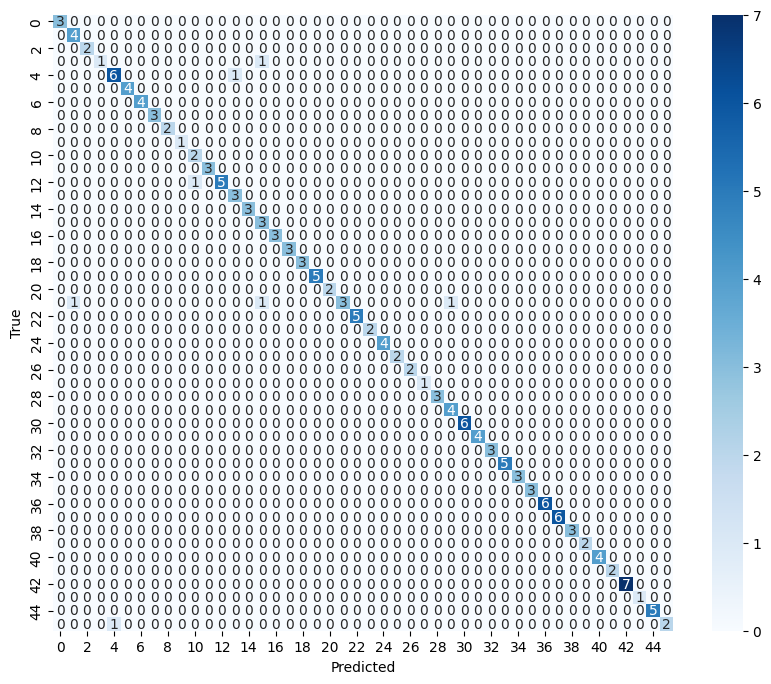

In [70]:

import seaborn as sns
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()